###### Pandas
###### Pandas is built on top of numpy so it gets all the benefits of numpy slicing, maksing, speed,... 

In [1]:
import pandas as pd

###### Pandas Series(1D array)

In [2]:
A = pd.Series([1,2,3,4], index=['a','b','c','d']) #think of these indices and value like dictionary

In [3]:
A

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
type(A)

pandas.core.series.Series

In [5]:
A.values

array([1, 2, 3, 4], dtype=int64)

In [6]:
type(A.values)

numpy.ndarray

In [7]:
type(A.index)

pandas.core.indexes.base.Index

In [8]:
A['a']

1

In [10]:
A['a':'c'] #both are inclusive here

a    1
b    2
c    3
dtype: int64

In [16]:
A = pd.Series([1,2,3,4], index= ['a','c','z','g'])

In [17]:
A.index

Index(['a', 'c', 'z', 'g'], dtype='object')

In [18]:
A['c']

2

In [20]:
A['a':'g'] #it will not take into account lexical sequence it will just go through all indices available till end is reached(incl.)

a    1
c    2
z    3
g    4
dtype: int64

###### Creating Series from dictionary

In [21]:
A = {'A': -1, 'B': -4, 'C': 6}


In [22]:
A_series = pd.Series(A)

In [23]:
A_series.values

array([-1, -4,  6], dtype=int64)

In [26]:
A_series.count()

3

In [27]:
A_series.index

Index(['A', 'B', 'C'], dtype='object')

In [36]:
A = {1.2 : 1, 3.5 : 1, 7.8: 9} #indices needn't be just strings

In [37]:
A_ser = pd.Series(A)

In [38]:
A_ser.values

array([1, 1, 9], dtype=int64)

In [39]:
A_ser.count()

3

In [40]:
A_ser.index

Float64Index([1.2, 3.5, 7.8], dtype='float64')

In [41]:
A_ser.value_counts()

1    2
9    1
dtype: int64

In [44]:
A_ser[0::] #pandas may get confused if indices are numerical and same as give number(int and have similar numbers)  

1.2    1
3.5    1
7.8    9
dtype: int64

###### Data Frame 

In [58]:
pd.DataFrame?

In [59]:
A = {1 : 'dog', 2: 'cat', 3: 'girraffe'}
B = {'a': 'super', 'b': 'duper' , 'c' : 'amazing'}

df = pd.DataFrame(A,B) #A - data and B - index

In [60]:
df

,1,2,3
a,dog,cat,girraffe
b,dog,cat,girraffe
c,dog,cat,girraffe


In [53]:
A = {'a' : 100, 'b' : 200}
B = {'1' : 'xyz', '2' : 'op'}

df = pd.DataFrame(A,index = ['a','b']) #we are using a and b as indices but still storing same value in both

In [51]:
df

,a,b
1,100,200
2,100,200


In [54]:
df = pd.DataFrame(A,index = ['1','2']) 

In [55]:
df

,a,b
1,100,200
2,100,200


In [62]:
A = {1 : 'dog', 2: 'cat', 3: 'girraffe'}
B = {1: 'super', 2: 'duper' , 3 : 'amazing'}

df = pd.DataFrame({'animals':A, 'quality': B})

In [63]:
df

,animals,quality
1,dog,super
2,cat,duper
3,girraffe,amazing


In [64]:
df.T

,1,2,3
animals,dog,cat,girraffe
quality,super,duper,amazing


In [65]:
df.columns

Index(['animals', 'quality'], dtype='object')

In [66]:
df.values

array([['dog', 'super'],
       ['cat', 'duper'],
       ['girraffe', 'amazing']], dtype=object)

In [67]:
type(df.values)

numpy.ndarray

In [69]:
df.values[0,1]

'super'

In [70]:
df

,animals,quality
1,dog,super
2,cat,duper
3,girraffe,amazing


In [72]:
df['nickname'] = ''

In [73]:
df

,animals,quality,nickname
1,dog,super,
2,cat,duper,
3,girraffe,amazing,


In [83]:
df

,animals,quality,nickname
1,dog,super,
2,cat,duper,
3,girraffe,amazing,


In [87]:
df['nickname'] = df['quality'].add_prefix('a')

In [88]:
df

,animals,quality,nickname
1,dog,super,NaN
2,cat,duper,NaN
3,girraffe,amazing,NaN


In [ ]:
del df['nickname']

In [7]:
A = {1: 85, 2:75,3:65}

df = pd.DataFrame({'grades': A})

In [8]:
df

,grades
1,85
2,75
3,65


In [9]:
D = df[df<70]

In [10]:
D

,grades
1,NaN
2,NaN
3,65.0


In [11]:
D = df[df['grades']<70]

In [12]:
D

,grades
3,65


In [13]:
df = pd.DataFrame([{'a':1, 'b':2},{'b':3, 'c':4}])

In [14]:
df

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [15]:
#NaN and None are used interchangably
df.isnull()

,a,b,c
0,False,False,True
1,True,False,False


###### Replacing null values

In [16]:
df.isnull().sum()

a    1
b    0
c    1
dtype: int64

In [18]:
df.dropna() #drops all records with na

,a,b,c


In [19]:
df = pd.DataFrame([{'a':1, 'b':2},{'b':3, 'c':4}])

In [25]:
#fillna(value) or replace(np.nan, replacement_value, inplace=boolean value)

df.sum()

a    1.0
b    5.0
c    4.0
dtype: float64

In [27]:
total_sum = df.sum().sum()

In [30]:
size = df.size

In [32]:
df.fillna(total_sum/size)

,a,b,c
0,1.000000,2,1.666667
1,1.666667,3,4.000000


###### Indexing
###### for implicit indices use A.iloc[1:3]
###### for explicit indices use A.loc[1:3]

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

###### Covid-19 Dataset operations

In [3]:
df = pd.read_csv('owid-covid-data.csv')

In [4]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64

In [6]:
df.notnull().sum()

iso_code                                   166326
continent                                  156370
location                                   166326
date                                       166326
total_cases                                163293
                                            ...  
human_development_index                    136253
excess_mortality_cumulative_absolute         5696
excess_mortality_cumulative                  5696
excess_mortality                             5696
excess_mortality_cumulative_per_million      5696
Length: 67, dtype: int64

In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
df.drop?

In [9]:
df.drop(['excess_mortality_cumulative','excess_mortality_cumulative_per_million'],axis= 1, inplace= True )

In [10]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
df['date'] #data is already in pandas date format

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
166321    2022-03-01
166322    2022-03-02
166323    2022-03-03
166324    2022-03-04
166325    2022-03-05
Name: date, Length: 166326, dtype: object

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['date']

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
166321   2022-03-01
166322   2022-03-02
166323   2022-03-03
166324   2022-03-04
166325   2022-03-05
Name: date, Length: 166326, dtype: datetime64[ns]

In [14]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,136778.000000,143949.000000,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,260.214412,8.210922,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,15.967077
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,119.860488,4.495202,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,30.092830
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-95.920000
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,168.711000,5.310000,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.752500
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,243.811000,7.170000,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,7.195000
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,329.942000,10.430000,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,22.997500
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,374.930000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    166326 non-null  object        
 1   continent                                   156370 non-null  object        
 2   location                                    166326 non-null  object        
 3   date                                        166326 non-null  datetime64[ns]
 4   total_cases                                 163293 non-null  float64       
 5   new_cases                                   163133 non-null  float64       
 6   new_cases_smoothed                          161150 non-null  float64       
 7   total_deaths                                145451 non-null  float64       
 8   new_deaths                                  145487 non-null  float64      

In [17]:
df2 = df.groupby?

In [32]:
df2 = df.groupby(['continent','date'])['continent','total_cases']

C:\Users\Asus\AppData\Local\Temp/ipykernel_3228/1994832690.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(['continent','date'])['continent','total_cases']


In [33]:
df2.head(5)

,continent,total_cases
0,Asia,5.0
1,Asia,5.0
2,Asia,5.0
3,Asia,5.0
4,Asia,5.0
...,...,...
157261,North America,32.0
157262,North America,55.0
157263,North America,74.0
157264,North America,107.0


In [34]:
import matplotlib.pyplot as plt

In [54]:
x = np.linspace(0,10,500)
y = np.tan(x)

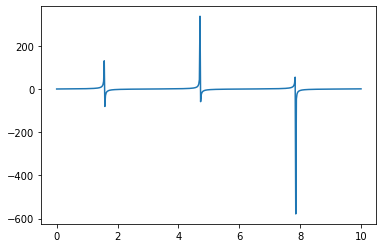

In [55]:
plt.plot(x,y)

In [57]:
x = 10
y = 30

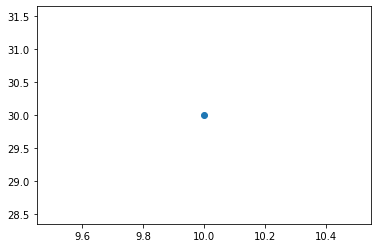

In [60]:
plt.scatter(x,y)

In [72]:
x = np.arange(10)
y = np.round(10*np.random.rand(10))
y

array([10.,  8.,  9.,  8.,  3.,  9.,  0.,  3.,  8.,  3.])

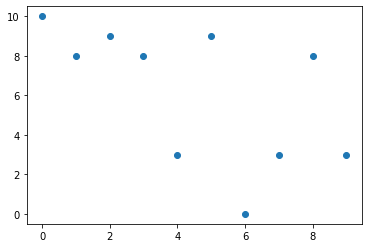

In [73]:
plt.scatter(x,y)